In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from scipy.stats import linregress



class Star:
    slope_slow = 0
    intercept_slow= 0
    slope_fast = 0
    intercept_fast = 0
    
    def __init__(self, period, mass):
        self.period = period
        self.mass = mass
        #abritrary horizontal line, set to (-5,,7) for rough equal data split 
        self.group = 1 if self.period >= calculate_line(0, self.mass, 7) else 0
        self.predict_fast = calculate_line(Star.slope_fast, self.mass, Star.intercept_fast)
        self.predict_slow = calculate_line(Star.slope_slow, self.mass, Star.intercept_slow)
        self.ser = square_err(self.period, self.predict_fast, self.predict_slow)
        self.weight_slow = 1 / (1 + self.ser )
        self.weight_fast = 1 / (1 + (1 / self.ser))
        
        
def get_data(location):
    """
    Takes string as input and returns a list of Star objects
    """
    data_frame = pd.read_csv(location, encoding = "utf-8", delimiter = "\t", comment = "#")

    mass = data_frame.M.tolist()
    period = data_frame.Per.tolist()
    
    return [Star(period, mass) for mass, period in zip(mass,period)]


def calculate_line(m,x,c):
    return np.add(np.dot(m,x), c)

def calculate_fits(star_list):
    
    slope_s, intercept_s = linregress([star.mass for star in star_list if star.group == 1],[star.period for star in star_list if star.group == 1])[:2]
    slope_f, intercept_f = 0, np.sum([star.period for star in star_list if star.group == 0])/len([star.group for star in star_list if star.group == 0])
#     slow_slope, slow_intercept = linregress([star.mass for star in star_list if star.group == 0],[star.period for star in star_list if star.group == 0])[:2]
    

    Star.slope_fast = slope_f
    Star.intercept_fast = intercept_f
    
    Star.slope_slow = slope_s
    Star.intercept_slow = intercept_s
    
def square_err(period, predict_fast, predict_slow):
    return (predict_slow - period)**2 / (predict_fast - period)**2

def calculate_mse(star_list):
    tot = 0
    for star in star_list:
        if star.group == 1:
            tot += (star.predict_slow - star.period)**2 * star.weight_slow
        else:
            tot += (star.predict_fast - star.period)**2 * star.weight_fast
#         tot += ((star.predict_fast - star.period)**2 *star.weight_fast) if star.group == 0 else ((star.predict_slow - star.period)**2 *star.weight_slow)
    return tot

def switch_group(datum):
    if datum == 1:
        return 0
    else:
        return 1

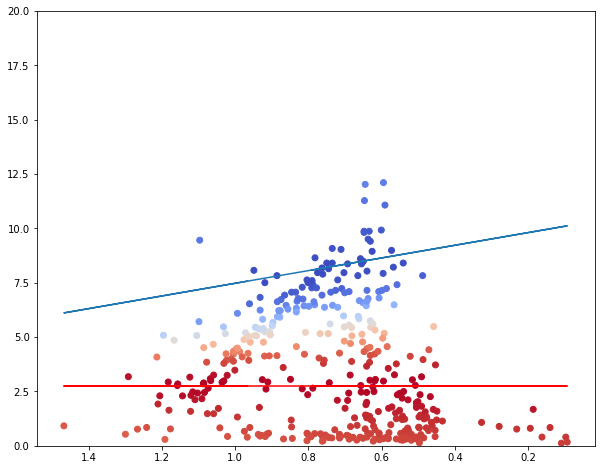

In [24]:
path = "d:data\Pleiades_Hartman.csv"
# path = "/home/edoodson/Documents/spin_down/data/Pleiades_Hartman.csv"


star_list = get_data(path)

calculate_fits(star_list)

figure1, ax1 = plt.subplots(1, figsize = (10,8))
ax1.invert_xaxis()
ax1.set(ylim = (0,20))
ax1.scatter([star.mass for star in star_list], [star.period for star in star_list], c=[star.weight_fast for star in star_list], cmap = "coolwarm")
ax1.plot([star.mass for star in star_list], [star.predict_fast for star in star_list], color = "red")
ax1.plot([star.mass for star in star_list], [star.predict_slow for star in star_list])



bfr: -2.912404074662518
aft: -2.8050163701390742

bfr: -2.8050163701390742
aft: -2.9954275358152778

bfr: -2.9954275358152778
aft: -2.9820558545273657

bfr: -2.9820558545273657
aft: -3.0228731049877386

bfr: -3.0228731049877386
aft: -1.6439852338722238

bfr: -1.6439852338722238
aft: -1.7707417125567038

bfr: -1.7707417125567038
aft: -3.463107794382525

bfr: -3.463107794382525
aft: -3.4539468721171085

bfr: -3.4539468721171085
aft: -3.3258009084393607

bfr: -3.3258009084393607
aft: -3.3648815870959847

bfr: -3.3648815870959847
aft: -3.293915454902799

bfr: -3.293915454902799
aft: -2.070520835722089

bfr: -2.070520835722089
aft: -2.9930813669793697

bfr: -2.9930813669793697
aft: -1.1363433866469321

bfr: -1.1363433866469321
aft: 0.002285409821966093

bfr: 0.002285409821966093
aft: 0.8530329950321286

bfr: 0.8530329950321286
aft: -0.12717207507850514

bfr: -0.12717207507850514
aft: 1.2382270075263289

bfr: 1.2382270075263289
aft: 2.2894876632771797

bfr: 2.2894876632771797
aft: 1.52925284

bfr: 2.2319975259380485
aft: 2.257353632353497

bfr: 2.257353632353497
aft: 1.9548009371557475

bfr: 1.9548009371557475
aft: 1.9597000278667083

bfr: 1.9597000278667083
aft: 1.9504999078210783

bfr: 1.9504999078210783
aft: 1.914867650084753

bfr: 1.914867650084753
aft: 1.9476023698614033

bfr: 1.9476023698614033
aft: 1.9627394638010673

bfr: 1.9627394638010673
aft: 2.0178816525687298

bfr: 2.0178816525687298
aft: 2.0210278407515556

bfr: 2.0210278407515556
aft: 2.0011200110282474

bfr: 2.0011200110282474
aft: 1.9893572738376961

bfr: 1.9893572738376961
aft: 2.0480252029882364

bfr: 2.0480252029882364
aft: 2.05773527647015

bfr: 2.05773527647015
aft: 2.046395164535888

bfr: 2.046395164535888
aft: 2.070773858546347

bfr: 2.070773858546347
aft: 2.03264978776907

bfr: 2.03264978776907
aft: 2.086314932475102

bfr: 2.086314932475102
aft: 2.0045020166481677

bfr: 2.0045020166481677
aft: 2.017388619349454

bfr: 2.017388619349454
aft: 1.9689116975148937

bfr: 1.9689116975148937
aft: 1.995796188

aft: 2.854215241766791

bfr: 2.854215241766791
aft: 2.84739090227955

bfr: 2.84739090227955
aft: 2.867367110930655

bfr: 2.867367110930655
aft: 2.875092713163245

bfr: 2.875092713163245
aft: 2.8499771045466717

bfr: 2.8499771045466717
aft: 2.801762789876568

bfr: 2.801762789876568
aft: 2.803551192869369

bfr: 2.803551192869369
aft: 2.8250648893413777

bfr: 2.8250648893413777
aft: 2.809071669711378

bfr: 2.809071669711378
aft: 2.812803760423489

bfr: 2.812803760423489
aft: 2.8175274174311884

bfr: 2.8175274174311884
aft: 2.8042387855985225

bfr: 2.8042387855985225
aft: 2.8166193880013264

bfr: 2.8166193880013264
aft: 2.800375974769763

bfr: 2.800375974769763
aft: 2.811539902621918

bfr: 2.811539902621918
aft: 2.811157871288665

bfr: 2.811157871288665
aft: 2.6998164421381756

bfr: 2.6998164421381756
aft: 2.690062981233823

bfr: 2.690062981233823
aft: 2.698375228917995

bfr: 2.698375228917995
aft: 2.6617502476853305



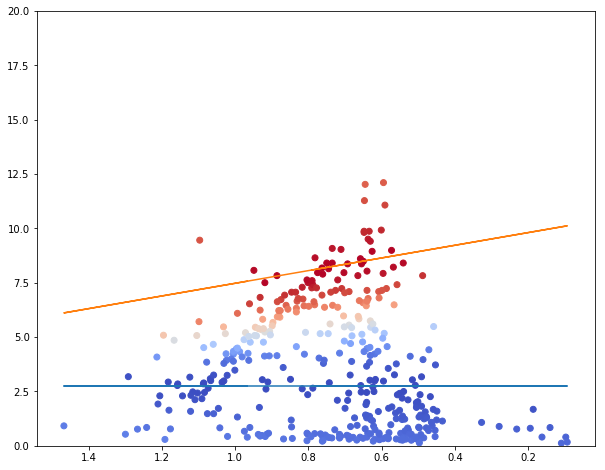

In [25]:

for i in range(1):
    for star in star_list:
        calculate_fits(star_list)
        print("bfr:",star.slope_slow)
        initial_mse = calculate_mse(star_list)
        
        star.group = switch_group(star.group)
        
        calculate_fits(star_list)
        print("aft:",star.slope_slow)
        print()
        final_mse = calculate_mse(star_list)
        
#         print("initial:", initial_mse, " ", "final:",final_mse)
        if final_mse > initial_mse:
            star.group = switch_group(star.group)

figure1, ax1 = plt.subplots(1, figsize = (10,8))
ax1.invert_xaxis()
ax1.set(ylim = (0,20))
ax1.scatter([star.mass for star in star_list], [star.period for star in star_list], c=[star.weight_slow for star in star_list], cmap = "coolwarm")
ax1.plot([star.mass for star in star_list], [star.predict_fast for star in star_list] )
ax1.plot([star.mass for star in star_list], [star.predict_slow for star in star_list])

